1.(a)  decrease spatial resulation by half

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

function to decrease spatial resolution by half

In [15]:
def decrease_resolution(image):
    height, weidth = image.shape
    decreased_image = np.zeros((height // 2 , weidth // 2))

    for r in range(0, height, 2):
        for c in range(0, weidth, 2):
            decreased_image[r // 2, c // 2] = image[r,c]

    return np.uint8(decreased_image)

loading the original image

In [16]:
original_image = cv2.imread("./Rose 1024x1024.tif", cv2.IMREAD_GRAYSCALE)
original_image = cv2.resize(original_image, (512 , 512))

decreasing the spatial resolution by half

In [ ]:
decreased_image = original_image.copy()
plt.figure(figsize = (13, 13))

for k in range(1, 5):
    plt.subplot(2, 2, k)
    plt.imshow(decreased_image, cmap = 'gray')
    height, weidth = decreased_image.shape
    plt.title(f"{height}x{weidth}")
    decreased_image = decrease_resolution(decreased_image)

plt.show()

1.(b)  decrease intensity level resolution by one bit upto binary level

In [20]:
def  decrease_resolution(image, number_of_bits):
    step = 255 / (2** number_of_bits - 1)
    height, weidth = image.shape
    decreased_image = image.copy()

    for r in range(height):
        for c in range(weidth):
            decreased_image[r,c] = round(image[r,c] / step) * step
    
    return decreased_image

loading original image

In [21]:
original_image2 = cv2.imread("./Skull 374x452.tif", 0)

decreasing intensity level resolution by one bit

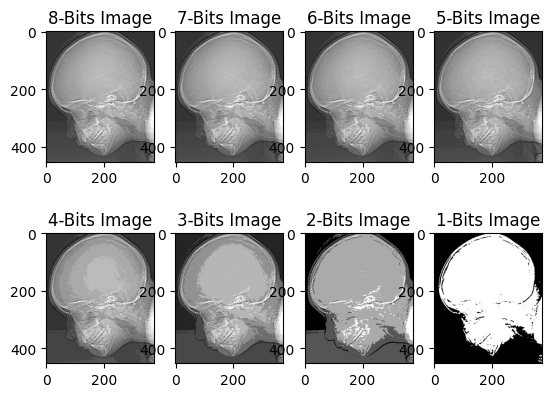

In [27]:
decreased_image = original_image2.copy()
plt.Figure(figsize = (13 , 13))

for k in range(1,9):
    plt.subplot(2, 4, k)
    number_of_bits = 9 - k
    decreased_image = decrease_resolution(decreased_image, number_of_bits)
    plt.imshow(cv2.cvtColor(decreased_image, cv2.COLOR_BGR2RGB))
    plt.title(f"{number_of_bits}-Bits Image")

plt.show()

1(c).  creating histogram and making single threshold segmentation and observe function for generating histogram

In [32]:
def generate_histogram(image):
    gray_levels_count = np.zeros(256)
    height, weidth = image.shape

    for r in range(height):
        for c in range(weidth):
            gray_levels_count[image[r,c]] += 1

    plt.bar(range(256), gray_levels_count, width = 1.0, color = "gray")
    plt.title("The histogram of the image")
    plt.show()

loading the origina image

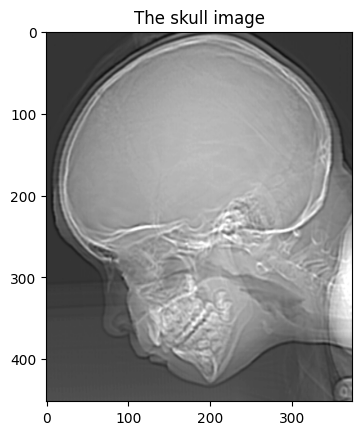

In [33]:
original_image = cv2.imread("./Skull 374x452.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("The skull image")
plt.show()

showing the histogram of the image

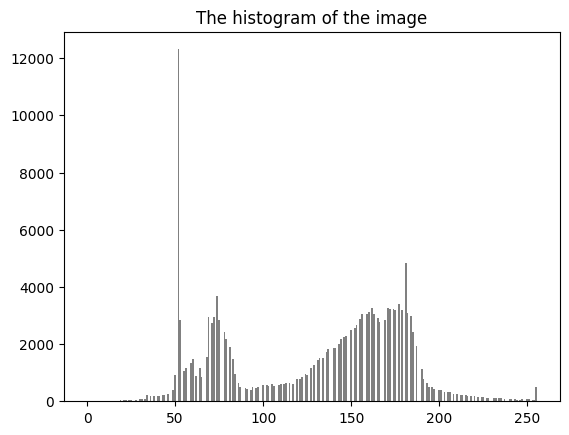

In [34]:
generate_histogram(original_image)

making single thresholding segmentation

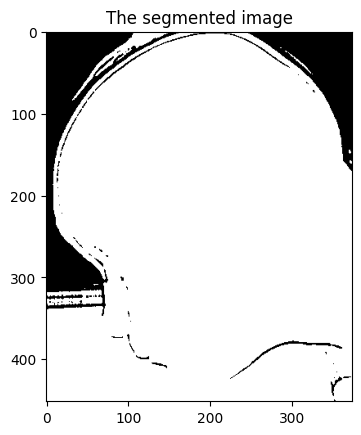

In [40]:
threshold_intensity = 60
segmented_image = np.where(original_image < threshold_intensity , 0, 255)
segmented_image = np.uint8(segmented_image)

plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title("The segmented image")
plt.show()

histogram of the segmented image

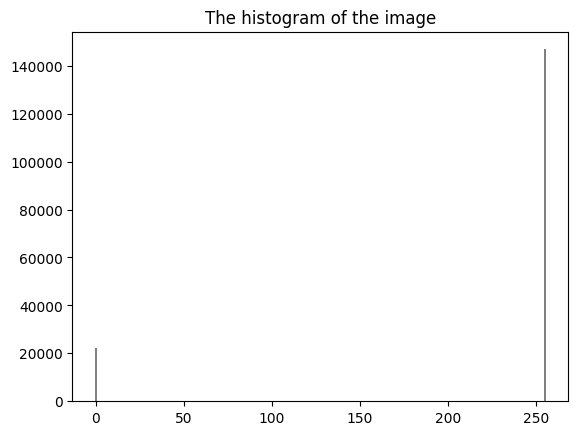

In [41]:
generate_histogram(segmented_image)